In [3]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
MODEL_DIR = './../../trained_models/dnn'
#MODEL_DIR = './../../trained_models/lstm'

targets = [os.path.join(MODEL_DIR,t) for t in os.listdir(MODEL_DIR)]

In [4]:
train_hist = 'train_hist.pkl'
test_metrics = 'test_metrics.pkl'
tm ={}
th = {}
for t in targets:
    with open(os.path.join(t, train_hist), 'rb') as f:
        if 'lstm' in MODEL_DIR:
            th[t] = pickle.load(f)[0]
        else:
            th[t] = pickle.load(f)
    with open(os.path.join(t, test_metrics), 'rb') as f:
        if 'lstm' in MODEL_DIR:    
            tm[t] = pickle.load(f)[0]
        else:
            tm[t] = pickle.load(f)


In [5]:
metrics = []
for t, m in tm.items():
    metrics.append(m)
metrics = np.array(metrics)
# removing nan from data
mdat = np.ma.masked_array(metrics,np.isnan(metrics))
avgs = mm = np.mean(mdat,axis=0)
print('Average test loss: {:}, average test accuracy: {:}'.format(avgs[0], avgs[1]))

Average test loss: 0.14773328770250815, average test accuracy: 0.9059060472781719


In [6]:
acc = []
v_acc = []
loss = []
v_loss = []
for t, m in th.items():
    acc.append(m['categorical_accuracy'])
    v_acc.append(m['val_categorical_accuracy'])
    loss.append(m['loss'])
    v_loss.append(m['val_loss'])

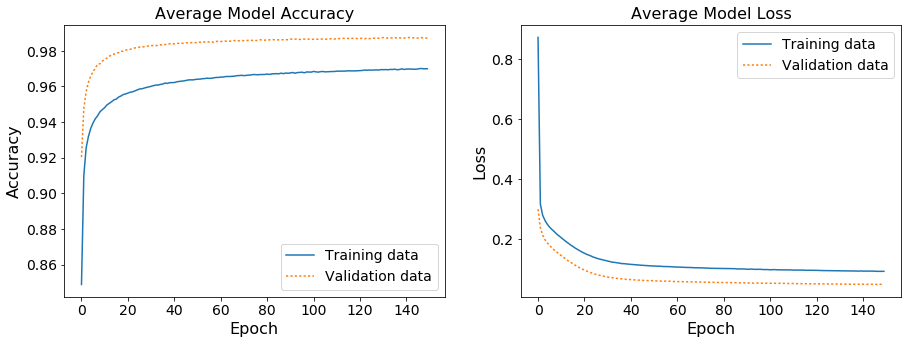

In [12]:
avg_acc = np.mean(acc, axis=0)
avg_val_acc = np.mean(v_acc, axis=0)
avg_loss = np.mean(loss, axis=0)
avg_v_loss = np.mean(v_loss, axis = 0)
plt.figure(figsize=(15, 5))
plt.subplot(121)
#plt.grid()
plt.plot(avg_acc)
plt.plot(avg_val_acc,':')
plt.title('Average Model Accuracy', fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Training data', 'Validation data'], loc='lower right', fontsize=14)
plt.subplot(122)
#plt.grid()
plt.plot(avg_loss)
plt.plot(avg_v_loss, ':')
plt.title('Average Model Loss', fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Training data', 'Validation data'], loc='upper right', fontsize=14)
plt.savefig('avg_training_metrics.eps', bbox_inches='tight',format='eps', dpi=500, transparent=True)
plt.show()

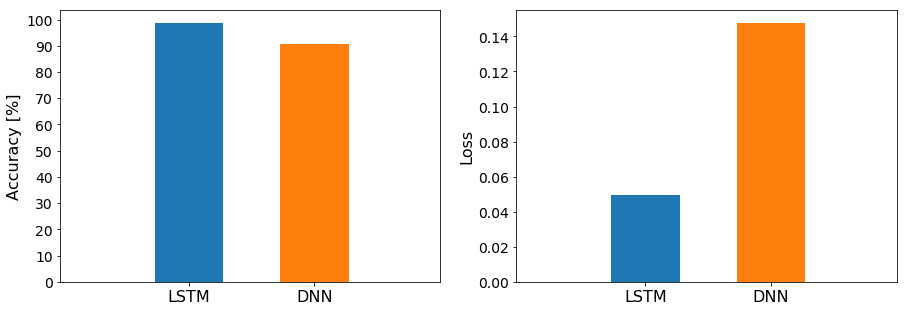

In [56]:
# LSTM vs DNN barplot
acc = [98.71, 90.59]
loss =[0.0496, 0.1477]

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(0.34, acc[0], width=0.18, label='LSTM')
plt.bar(0.67, acc[1], width=0.18, label='DNN')
plt.xlim([0,1])
plt.xticks([0.34, 0.67], ['LSTM', 'DNN'], fontsize=16)
plt.yticks(np.arange(0,110,10),fontsize=14)
plt.ylabel('Accuracy [%]', fontsize=16)
#plt.legend(loc='upper center', fontsize=14)
plt.subplot(122)
plt.bar(0.34, loss[0], width=0.18, label='LSTM')
plt.bar(0.67, loss[1], width=0.18, label='DNN')
plt.xlim([0,1])
plt.xticks([])
plt.xticks([0.34, 0.67], ['LSTM', 'DNN'], fontsize=16)
plt.yticks(fontsize=14)
plt.ylabel('Loss',fontsize=16)
#plt.legend(loc='upper left', fontsize=14)
plt.savefig('lstm_dnn.eps', transparent=True, format='eps', dpi=500,bbox_inches='tight')
plt.show()